# First order defferential equation


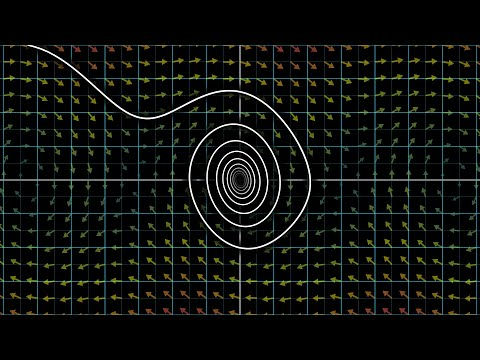

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('p_di4Zn4wz4',width=640,height=360)

## <center>Analytical solution of a first order differential equation</center>
<img src="https://github.com/chenziao/Computational-Neuroscience-Tutorials/blob/master/Getting%20Started%20with%20Math/analytical_solution.png?raw=1" style="text-align:center">  
## <center>Numerical solution of a first order defferential equation</center>
<img src="https://github.com/chenziao/Computational-Neuroscience-Tutorials/blob/master/Getting%20Started%20with%20Math/numerical_solution.png?raw=1" style="text-align:center">  

### Set up the first order differential equation and convert it into standard form assuming input u(t) is a constant.

a1,a2 and a3 are coefficients of the first order differential equation:  $ a_{1}\dot{y}\left(t\right) + a_{2}y(\left(t\right) = a_{3}u\left(t\right); \ \ y\left(0\right)=y_{0}, \quad where\: u\left(t\right) = 1 $.  
Convert into standard form:  $ \tau \dot{y}\left(t\right) + y\left(t\right) = Ku\left(t\right); \ \ y\left(0\right)=y_{0} $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# coefficients of the first order differential equation: a1*y'(t) + a2*y(t) = a3*u(t),  where u(t) = 1
a1,a2,a3 = 1,3,-30 # example of y'+3y=-30
y0 = -60 # y(tstart) initial y at t=tstart

# convert into standard form: tau*y'(t) + y(t) = K*u(t)
tau = a1/a2
K = a3/a2

# computational parameters
dt = 0.01  # time step size
tstart = 0 # initial time
tstop = 2  # stop time

# initialize
t = np.arange(tstart,tstop,dt)
y = np.empty(t.shape)
y[0] = Y = y0

# iteratively solve
for i in range(1,t.size):
    Y += (K-Y)/tau*dt
    y[i] = Y

### Plot analytical solution and numerical solution.

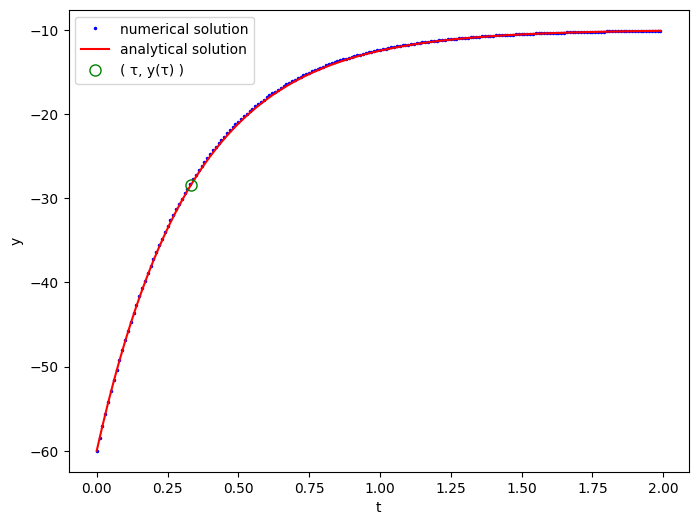

In [3]:
y_analy = K-(K-y0)*np.exp(-(t-tstart)/tau) # analytical solution

y_tau = y0+(K-y0)*(1-np.exp(-1))  # y(tstart+tau) system reaches the 63.2% of the change in value from initial value in one time constant.

plt.figure(figsize=(8,6))
plt.plot(t,y,'b.',markersize=3)
plt.plot(t,y_analy,'r')
plt.plot(tstart+tau,y_tau,'go',markerfacecolor='none',markersize=8)
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['numerical solution','analytical solution','( \u03C4, y(\u03C4) )'])
plt.show()

### Interactive tool for getting the solution

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display, Math

def solveODE(a1,a2,a3,y0,tau,K,tstart,tstop,dt):
    t = np.arange(tstart,tstop,dt)
    y = np.empty(t.shape)
    y[0] = Y = y0

    for i in range(1,t.size):
        Y += (K-Y)/tau*dt
        y[i] = Y

    y_analy = K-(K-y0)*np.exp(-(t-tstart)/tau) # analytical solution

    y_tau = y0+(K-y0)*(1-np.exp(-1))  # y(tau) system reaches the 63.2% of the change in value from initial value in one time constant.

    plt.figure(figsize=(10,6))
    plt.plot(t,y,'b.',markersize=3)
    plt.plot(t,y_analy,'r')
    plt.plot(tstart+tau,y_tau,'go',markerfacecolor='none',markersize=8)
    plt.grid()
    plt.xlim(tstart,tstop)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(['numerical solution','analytical solution','( \u03C4, y(\u03C4) )'])
    plt.show()

    print('Time constant: \u03C4= %.2f' % tau)

In [5]:
# default settings
a1,a2,a3 = 1,3,-30
y0 = -60
tau = a1/a2
K = a3/a2
tstart,tstop,dt = 0.0,2.0,0.01
duration = tstop-tstart

L_s = Layout(width='12%')
L_m = Layout(width='20%')
L_l = Layout(width='35%')
L_ctr = Layout(justify_content='center')
L_left = Layout(justify_content='flex-start')

w_tstart = widgets.FloatText(value=tstart,description='Start time',layout=L_m)
w_tstop = widgets.BoundedFloatText(value=tstop,min=tstart+10*dt,max=tstart+1e9,step=1,description='Stop time',layout=L_m)
w_dt = widgets.FloatLogSlider(value=dt,base=10,min=-5,max=0,step=0.05,description='Time step',readout_format='.5f',layout=L_l)
w_a1 = widgets.BoundedFloatText(value=a1,min=1e-9,max=1e9,layout=L_l)
w_a2 = widgets.BoundedFloatText(value=a2,min=1e-9,max=1e9,layout=L_l)
w_a3 = widgets.FloatText(value=a3,layout=L_l)
w_y0 = widgets.FloatText(value=y0,layout=L_m)
w_K = widgets.FloatText(value=K,layout=L_m)
w_tau = widgets.FloatSlider(value=tau,min=dt,max=duration,step=dt,continuous_update=False,readout_format='.2f',layout=L_l)

def update_tstop(*args):
    w_tstop.value = w_tstart.value+duration
    w_tstop.min = w_tstart.value+10*w_dt.value
    w_tstop.max = w_tstart.value+1e9
w_tstart.observe(update_tstop,'value')
w_dt.observe(update_tstop,'value')

def update_duration(*args):
    global duration
    duration = w_tstop.value-w_tstart.value
w_tstop.observe(update_duration,'value')

def update_tau(*args):
    w_tau.min = w_dt.value
    w_tau.max = max(duration,w_a1.value/w_a2.value)
    w_tau.step = w_dt.value
    w_tau.value = w_a1.value/w_a2.value
    w_K.value = w_a3.value/w_a2.value
w_a1.observe(update_tau,'value')
w_a2.observe(update_tau,'value')
w_a3.observe(update_tau,'value')
w_tstop.observe(update_tau,'value')
w_dt.observe(update_tau,'value')

def update_a(*args):
    w_a1.value = w_a2.value*w_tau.value
    w_a3.value = w_a2.value*w_K.value
w_tau.observe(update_a,'value')
w_K.observe(update_a,'value')

ui1 = HBox([w_tstart,w_tstop,w_dt],layout=L_left)
expr1 = Math(r'$\quad\quad \text{Differential equation:} \quad a_{1}\dot{y}\left(t\right) + a_{2}y\left(t\right) = a_{3}; \quad y\left(0\right)=y_{0} $')
ui2 = HBox([HBox([Label(value='a1',layout=L_s),w_a1],layout=L_ctr),HBox([Label(value='a2',layout=L_s),w_a2],layout=L_ctr),
                 HBox([Label(value='a3',layout=L_s),w_a3],layout=L_ctr)],layout=L_left)
expr2 = Math(r'$\quad\quad \text{Standard form:} \quad \tau\dot{y}\left(t\right) + y\left(t\right) = K; \quad y\left(0\right)=y_{0}$')
ui3 = HBox([HBox([Label(value='Initial value y0',layout=L_m),w_y0,Label(value='Final value K',layout=L_m),w_K],layout=L_ctr),
                 Label(value='Time constant \u03C4',layout=L_s),w_tau],layout=L_left)

out = widgets.interactive_output(solveODE,{'tstart':w_tstart,'tstop':w_tstop,'dt':w_dt,
                                              'a1':w_a1,'a2':w_a2,'a3':w_a3,'y0':w_y0,'K':w_K,'tau':w_tau})

display(Math(r''),ui1,expr1,ui2,expr2,ui3,out)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Output()